In [1]:
# 라이브러리 로드 하기
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# 데이터셋 로드하기
df = sns.load_dataset("flights")
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [4]:
year = 2020
month = "March"

year + month # year와 month는 데이터 type 다르기에 서로 붙일 수 없다

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [5]:
year = 2020
month = "March"

f"{year} {month} 1" # 따라서 formating 형식으로 함 

'2020 March 1'

In [6]:
from datetime import datetime
year = 2020
month = "March"

s = f"{year} {month} 1"  
datetime.strptime(s, "%Y %B %d")

datetime.datetime(2020, 3, 1, 0, 0)

In [7]:
from datetime import datetime
year = 2020
month = "March"

s = f"{year} {month} 1"  
d = datetime.strptime(s, "%Y %B %d")
d.strftime("%Y-%m-%d")

'2020-03-01'

In [8]:
# datetime 함수를 만들어 date 형태로 반환
def find_datetime1(row):
    return row

In [9]:
row = {"year":1949, "month":"January"}
find_datetime1(row)

{'year': 1949, 'month': 'January'}

In [10]:
# datetime 함수를 만들어 date 형태로 반환
def find_datetime(row):
    year = row["year"]
    month = row["month"]
    
    s = f"{year} {month} 1"
    d = datetime.strptime(s, "%Y %b %d") # df 에서 month의 형태가 Jab로 %b로 받아야함
     
    return d.strftime("%Y-%m-%d")

In [11]:
df.apply(find_datetime, axis=1) # axis = 1은 열을 중심으로, axis = 0은 행을 중심으로 적용 

0      1949-01-01
1      1949-02-01
2      1949-03-01
3      1949-04-01
4      1949-05-01
          ...    
139    1960-08-01
140    1960-09-01
141    1960-10-01
142    1960-11-01
143    1960-12-01
Length: 144, dtype: object

In [12]:
df["data"] = df.apply(find_datetime, axis=1)
df

,year,month,passengers,data
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01
...,...,...,...,...
139,1960,Aug,606,1960-08-01
140,1960,Sep,508,1960-09-01
141,1960,Oct,461,1960-10-01
142,1960,Nov,390,1960-11-01


In [16]:
import pandas as pd

df["date"] = df.apply(find_datetime, axis=1)
df["date"] = pd.to_datetime(df["date"])
df["date"].head()

0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
Name: date, dtype: datetime64[ns]

<AxesSubplot:xlabel='date', ylabel='passengers'>

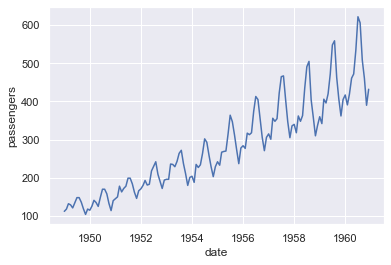

In [17]:
sns.lineplot(data=df, x="date", y="passengers")

<AxesSubplot:xlabel='date', ylabel='passengers'>

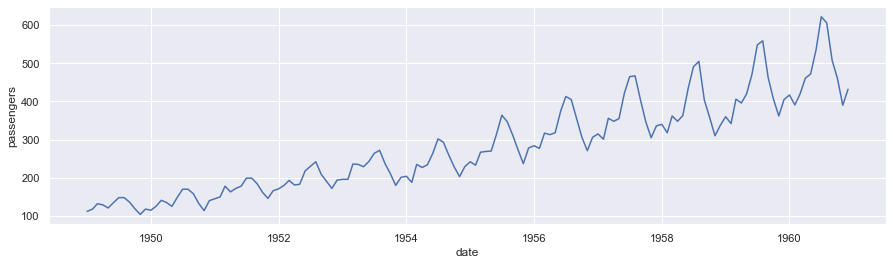

In [18]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="date", y="passengers")